In [2]:
# lets load the data
import pandas as pd

data = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
data.head(2)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1/60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1/50,1,0,0,1,0,0,0


In [3]:
data.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [ ]:
# Question: What is the relationship between income and the likelihood of personal loan approval, and how does it vary across different education levels?

# To answer this question, you can group the data by education level and analyze the average income for approved loans.
loan_approval_by_income_education = data[data['Personal Loan'] == 1].groupby('Education')['Income'].mean()
print(loan_approval_by_income_education)

In [5]:
data.Age.describe()

count    5000.000000
mean       45.338400
std        11.463166
min        23.000000
25%        35.000000
50%        45.000000
75%        55.000000
max        67.000000
Name: Age, dtype: float64

In [11]:
# lets create python function which will take age and compute % of loan approval
def age_loan_perc(age):
    total = data.shape[0]
    age_data = data[(data['Age'] <= age) & (data['Personal Loan'] == 1)] # filter age and loan approved where age is less than or equal to input age
    perc = (age_data.shape[0] / total) * 100
    return perc



In [15]:
data['Personal Loan'].value_counts()

Personal Loan
0    4520
1     480
Name: count, dtype: int64

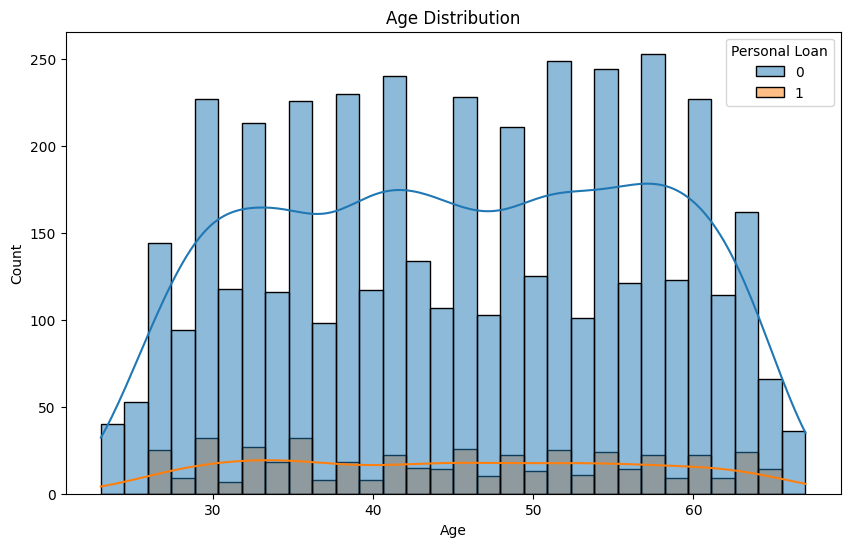

In [20]:
# lets plot the age vs loan approval %
import matplotlib.pyplot as plt
import seaborn as sns
# histogram of age for loan approval
plt.figure(figsize=(10,6))
sns.histplot(data=data, x='Age', hue='Personal Loan', bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()
